In [8]:
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
!pip install gdown --upgrade
 # Place the Google Drive Sharing link
file_share_link = "https://drive.google.com/file/d/17j1_h2O4UOLe_jCjXpUf3iZ2W6n1gby1/view?usp=sharing"

# extract the ID of the file
file_id = file_share_link[file_share_link.find("d/")+2 : file_share_link.find("/v")]
print(file_id)
!gdown "$file_id" # Download the data from Google Drive

In [10]:
!gunzip GoogleNews-vectors-negative300.bin.gz

In [7]:
word2vec_model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin', binary=True)


In [11]:
data=pd.read_csv('Hindustan_Clean.csv')

In [12]:
data.head()

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
0,7,stoke to unleash promising spin duo on india a...,15,3,4,1,1,5
1,7,more than man ganguly s bonafide remark on wom...,14,1,6,1,1,4
2,7,rohit s chance to make up for wc gavaskar s bi...,15,4,3,1,1,5
3,7,watch crowd queue up outside shami s house aft...,13,3,5,0,2,2
4,7,hafeez slams australia for pakistan s warm up ...,14,5,2,2,1,3


In [13]:
data.describe()

,label,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
count,214.00000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,4.28972,11.897196,2.210280,3.635514,0.971963,1.514019,2.780374
std,2.24135,2.162135,1.893326,1.570817,0.913724,0.912763,1.921802
min,1.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,10.000000,1.000000,3.000000,0.000000,1.000000,1.000000
50%,4.00000,12.000000,2.000000,3.000000,1.000000,1.000000,3.000000
75%,6.00000,13.000000,3.000000,5.000000,1.000000,2.000000,4.000000
max,8.00000,17.000000,10.000000,9.000000,4.000000,5.000000,11.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7c984d5e2440>,
 'caps': [<matplotlib.lines.Line2D at 0x7c984d5e2980>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c984d5e21a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c984d5e2ec0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c984d5e3160>],
 'means': []}

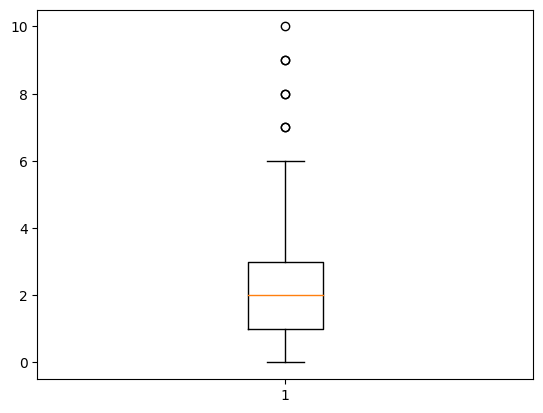

In [14]:
plt.boxplot(data['prop_count'])

In [15]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        def range_(value):
          if (value<lower_limit):
            return lower_limit
          if (value>upper_limit):
            return upper_limit
          else:
            return value

        df[col]=df[col].apply(range_)

    return df

columns_=['prop_count','noun_count','adj_count','verb_count','stop_count']
remove_outliers(data,columns_)

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
0,7,stoke to unleash promising spin duo on india a...,15,3.0,4.0,1.0,1.0,5.0
1,7,more than man ganguly s bonafide remark on wom...,14,1.0,6.0,1.0,1.0,4.0
2,7,rohit s chance to make up for wc gavaskar s bi...,15,4.0,3.0,1.0,1.0,5.0
3,7,watch crowd queue up outside shami s house aft...,13,3.0,5.0,0.0,2.0,2.0
4,7,hafeez slams australia for pakistan s warm up ...,14,5.0,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...
209,5,indonesia s prambanan temple testimony to indi...,13,6.0,2.0,0.0,0.0,2.0
210,5,mooli for weight loss and immunity 7 benefit 7...,14,0.0,7.0,1.0,1.0,3.0
211,5,we approve crispr gene edit to treat sickle ce...,10,0.0,4.0,1.0,3.0,2.0
212,5,sleep deprivation and vertigo here s how lack ...,13,0.0,5.0,1.0,2.0,5.0


In [16]:
data.describe()

,label,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
count,214.00000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,4.28972,11.897196,2.135514,3.630841,0.927570,1.497664,2.768692
std,2.24135,2.162135,1.674260,1.556203,0.808196,0.867376,1.878717
min,1.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,10.000000,1.000000,3.000000,0.000000,1.000000,1.000000
50%,4.00000,12.000000,2.000000,3.000000,1.000000,1.000000,3.000000
75%,6.00000,13.000000,3.000000,5.000000,1.000000,2.000000,4.000000
max,8.00000,17.000000,6.000000,8.000000,2.500000,3.500000,8.500000


{'whiskers': [<matplotlib.lines.Line2D at 0x7c984b505810>,
 'caps': [<matplotlib.lines.Line2D at 0x7c984b505d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c984b505570>],
 'medians': [<matplotlib.lines.Line2D at 0x7c984b506290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c984b506530>],
 'means': []}

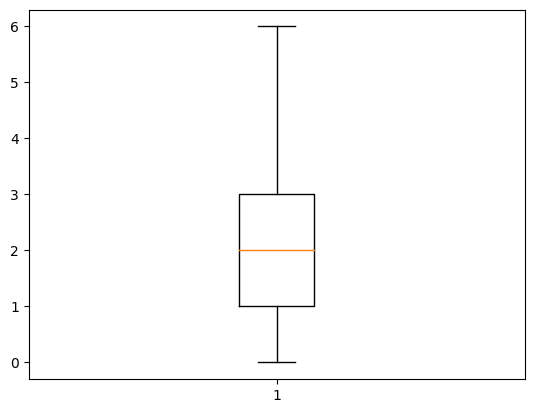

In [17]:
plt.boxplot(data['prop_count'])

In [18]:
data['adj_count']=np.log1p(data['adj_count'])
data['prop_count']=np.log1p(data['prop_count'])
data['noun_count']=np.log1p(data['noun_count'])
data['verb_count']=np.log1p(data['verb_count'])
data['stop_count']=np.log1p(data['stop_count'])

In [19]:
def text_to_vector(text):
    words = text.split()
    vectors = [word2vec_model[word] for word in words if word in word2vec_model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size) #This line of code is a concise way of handling the case when the list vectors is non-empty and when it is empty.

# Apply the function to the 'text' column and create a new column 'text_vector'
data['text_vec'] = data['clean_text'].apply(text_to_vector)

In [20]:
data.head()

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count,text_vec
0,7,stoke to unleash promising spin duo on india a...,15,1.386294,1.609438,0.693147,0.693147,1.791759,"[0.001399449, 0.041538782, 0.056522913, 0.0506..."
1,7,more than man ganguly s bonafide remark on wom...,14,0.693147,1.945910,0.693147,0.693147,1.609438,"[-0.047785833, 0.015211839, 0.020560632, 0.076..."
2,7,rohit s chance to make up for wc gavaskar s bi...,15,1.609438,1.386294,0.693147,0.693147,1.791759,"[-0.044311523, 0.0668288, 0.05442458, 0.066983..."
3,7,watch crowd queue up outside shami s house aft...,13,1.386294,1.791759,0.000000,1.098612,1.098612,"[0.0138060255, 0.06093343, 0.061187744, 0.0894..."
4,7,hafeez slams australia for pakistan s warm up ...,14,1.791759,1.098612,1.098612,0.693147,1.386294,"[-0.059537448, 0.06601759, 0.03233924, 0.04731..."


In [21]:
data.drop(columns=['clean_text'],inplace=True)

In [22]:
data.head()

,label,word_count,prop_count,noun_count,adj_count,verb_count,stop_count,text_vec
0,7,15,1.386294,1.609438,0.693147,0.693147,1.791759,"[0.001399449, 0.041538782, 0.056522913, 0.0506..."
1,7,14,0.693147,1.945910,0.693147,0.693147,1.609438,"[-0.047785833, 0.015211839, 0.020560632, 0.076..."
2,7,15,1.609438,1.386294,0.693147,0.693147,1.791759,"[-0.044311523, 0.0668288, 0.05442458, 0.066983..."
3,7,13,1.386294,1.791759,0.000000,1.098612,1.098612,"[0.0138060255, 0.06093343, 0.061187744, 0.0894..."
4,7,14,1.791759,1.098612,1.098612,0.693147,1.386294,"[-0.059537448, 0.06601759, 0.03233924, 0.04731..."


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       214 non-null    int64  
 1   word_count  214 non-null    int64  
 2   prop_count  214 non-null    float64
 3   noun_count  214 non-null    float64
 4   adj_count   214 non-null    float64
 5   verb_count  214 non-null    float64
 6   stop_count  214 non-null    float64
 7   text_vec    214 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 13.5+ KB


In [24]:
type(data['text_vec'])

pandas.core.series.Series

In [25]:
np.ndim(data.text_vec)

1

In [26]:
vector_columns = pd.DataFrame(data['text_vec'].to_list(), columns=[f'word2vec_{i}' for i in range(word2vec_model.vector_size)])
new_data= pd.concat([data, vector_columns], axis=1)

In [27]:
vector_columns

,word2vec_0,word2vec_1,word2vec_2,word2vec_3,word2vec_4,word2vec_5,word2vec_6,word2vec_7,word2vec_8,word2vec_9,...,word2vec_290,word2vec_291,word2vec_292,word2vec_293,word2vec_294,word2vec_295,word2vec_296,word2vec_297,word2vec_298,word2vec_299
0,0.001399,0.041539,0.056523,0.050664,0.028486,-0.000153,-0.038339,-0.175180,0.009905,0.100063,...,0.030448,0.064850,-0.138105,0.016726,-0.119759,-0.047347,-0.024073,-0.060726,-0.041678,-0.036523
1,-0.047786,0.015212,0.020561,0.076632,-0.004329,-0.064810,0.018085,-0.108638,0.095460,0.020160,...,0.026245,-0.010003,-0.079437,0.016362,-0.033278,-0.024334,-0.042396,-0.036907,-0.043936,0.056999
2,-0.044312,0.066829,0.054425,0.066984,0.030311,-0.017306,0.042382,-0.101067,0.071524,0.063127,...,-0.015869,0.072303,-0.085693,0.016630,-0.033114,-0.094851,-0.048938,-0.015024,0.027104,0.045988
3,0.013806,0.060933,0.061188,0.089488,-0.018021,-0.042661,0.037854,-0.097125,0.034403,0.101089,...,0.034003,0.017426,-0.167908,0.067897,-0.036764,-0.070542,-0.071869,0.035962,-0.014715,0.059769
4,-0.059537,0.066018,0.032339,0.047314,-0.037959,-0.042715,0.039209,-0.131348,0.010784,0.075590,...,-0.054903,0.107220,-0.159142,0.050955,-0.054500,-0.081075,-0.026078,-0.002117,-0.036058,0.103516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,-0.078158,0.012984,0.005887,0.103227,0.033325,-0.012828,0.060469,-0.208629,-0.010099,0.123918,...,0.013417,0.066864,-0.023082,0.097637,-0.035842,-0.085227,-0.103455,-0.043329,0.122835,0.121404
210,-0.004189,0.003640,0.001224,0.110773,-0.074330,0.056752,0.107780,-0.044453,0.063654,0.201305,...,-0.025543,0.006337,-0.018560,0.005815,0.042247,0.045193,-0.076735,-0.033991,0.011142,0.018865
211,-0.106155,0.105194,0.059471,0.145103,-0.187805,-0.069946,0.077896,-0.047401,0.044403,0.029968,...,-0.027985,0.031891,0.002380,0.034761,-0.081924,0.070839,-0.168442,-0.051880,0.179138,0.175182
212,0.067272,0.009832,-0.030878,0.072354,-0.101474,0.082076,0.049771,-0.155950,0.057146,0.027643,...,-0.086526,0.094249,-0.071859,-0.041790,-0.133051,-0.003096,-0.066578,-0.018505,0.083191,0.017556


In [28]:
new_data.head()

,label,word_count,prop_count,noun_count,adj_count,verb_count,stop_count,text_vec,word2vec_0,word2vec_1,...,word2vec_290,word2vec_291,word2vec_292,word2vec_293,word2vec_294,word2vec_295,word2vec_296,word2vec_297,word2vec_298,word2vec_299
0,7,15,1.386294,1.609438,0.693147,0.693147,1.791759,"[0.001399449, 0.041538782, 0.056522913, 0.0506...",0.001399,0.041539,...,0.030448,0.064850,-0.138105,0.016726,-0.119759,-0.047347,-0.024073,-0.060726,-0.041678,-0.036523
1,7,14,0.693147,1.945910,0.693147,0.693147,1.609438,"[-0.047785833, 0.015211839, 0.020560632, 0.076...",-0.047786,0.015212,...,0.026245,-0.010003,-0.079437,0.016362,-0.033278,-0.024334,-0.042396,-0.036907,-0.043936,0.056999
2,7,15,1.609438,1.386294,0.693147,0.693147,1.791759,"[-0.044311523, 0.0668288, 0.05442458, 0.066983...",-0.044312,0.066829,...,-0.015869,0.072303,-0.085693,0.016630,-0.033114,-0.094851,-0.048938,-0.015024,0.027104,0.045988
3,7,13,1.386294,1.791759,0.000000,1.098612,1.098612,"[0.0138060255, 0.06093343, 0.061187744, 0.0894...",0.013806,0.060933,...,0.034003,0.017426,-0.167908,0.067897,-0.036764,-0.070542,-0.071869,0.035962,-0.014715,0.059769
4,7,14,1.791759,1.098612,1.098612,0.693147,1.386294,"[-0.059537448, 0.06601759, 0.03233924, 0.04731...",-0.059537,0.066018,...,-0.054903,0.107220,-0.159142,0.050955,-0.054500,-0.081075,-0.026078,-0.002117,-0.036058,0.103516


In [29]:
X=new_data.drop(['label','word_count','text_vec'],axis=1)
# X=new_data.drop(['prop_count','noun_count','adj_count','verb_count','stop_count','label','word_count','text_vec'],axis=1)

In [30]:
X

,prop_count,noun_count,adj_count,verb_count,stop_count,word2vec_0,word2vec_1,word2vec_2,word2vec_3,word2vec_4,...,word2vec_290,word2vec_291,word2vec_292,word2vec_293,word2vec_294,word2vec_295,word2vec_296,word2vec_297,word2vec_298,word2vec_299
0,1.386294,1.609438,0.693147,0.693147,1.791759,0.001399,0.041539,0.056523,0.050664,0.028486,...,0.030448,0.064850,-0.138105,0.016726,-0.119759,-0.047347,-0.024073,-0.060726,-0.041678,-0.036523
1,0.693147,1.945910,0.693147,0.693147,1.609438,-0.047786,0.015212,0.020561,0.076632,-0.004329,...,0.026245,-0.010003,-0.079437,0.016362,-0.033278,-0.024334,-0.042396,-0.036907,-0.043936,0.056999
2,1.609438,1.386294,0.693147,0.693147,1.791759,-0.044312,0.066829,0.054425,0.066984,0.030311,...,-0.015869,0.072303,-0.085693,0.016630,-0.033114,-0.094851,-0.048938,-0.015024,0.027104,0.045988
3,1.386294,1.791759,0.000000,1.098612,1.098612,0.013806,0.060933,0.061188,0.089488,-0.018021,...,0.034003,0.017426,-0.167908,0.067897,-0.036764,-0.070542,-0.071869,0.035962,-0.014715,0.059769
4,1.791759,1.098612,1.098612,0.693147,1.386294,-0.059537,0.066018,0.032339,0.047314,-0.037959,...,-0.054903,0.107220,-0.159142,0.050955,-0.054500,-0.081075,-0.026078,-0.002117,-0.036058,0.103516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.945910,1.098612,0.000000,0.000000,1.098612,-0.078158,0.012984,0.005887,0.103227,0.033325,...,0.013417,0.066864,-0.023082,0.097637,-0.035842,-0.085227,-0.103455,-0.043329,0.122835,0.121404
210,0.000000,2.079442,0.693147,0.693147,1.386294,-0.004189,0.003640,0.001224,0.110773,-0.074330,...,-0.025543,0.006337,-0.018560,0.005815,0.042247,0.045193,-0.076735,-0.033991,0.011142,0.018865
211,0.000000,1.609438,0.693147,1.386294,1.098612,-0.106155,0.105194,0.059471,0.145103,-0.187805,...,-0.027985,0.031891,0.002380,0.034761,-0.081924,0.070839,-0.168442,-0.051880,0.179138,0.175182
212,0.000000,1.791759,0.693147,1.098612,1.791759,0.067272,0.009832,-0.030878,0.072354,-0.101474,...,-0.086526,0.094249,-0.071859,-0.041790,-0.133051,-0.003096,-0.066578,-0.018505,0.083191,0.017556


In [31]:
Y=data.label
Y

0      7
1      7
2      7
3      7
4      7
      ..
209    5
210    5
211    5
212    5
213    5
Name: label, Length: 214, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from scipy.sparse import hstack, csr_matrix
# from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier


In [33]:
x_train,x_test,y_train,y_test=train_test_split(X , Y , test_size=0.2, random_state=42)

In [34]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((171, 305), (43, 305), (171,), (43,))

In [35]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [36]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [37]:
train_pred=model.predict(x_train)

In [38]:
accuracy_score(y_train,train_pred)

0.9941520467836257

In [39]:
test_pred=model.predict(x_test)

In [40]:
accuracy_score(y_test,test_pred)

0.6744186046511628

In [41]:
model_1=GaussianNB()

In [42]:
model_1.fit(x_train,y_train)

GaussianNB()

In [43]:
train_pred_=model_1.predict(x_train)

In [44]:
accuracy_score(y_train,train_pred_)

0.9590643274853801

In [45]:
test_pred_=model_1.predict(x_test)

In [46]:
accuracy_score(y_test,test_pred_)

0.6744186046511628